In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearning/datasets/linear_regression_dataset.csv", sep = ';')

In [10]:
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


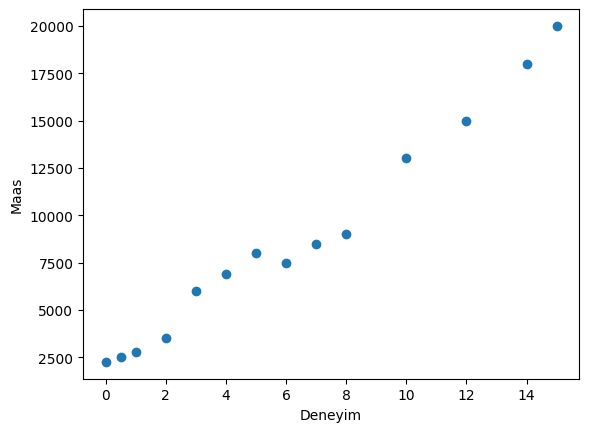

In [11]:
plt.scatter(df.deneyim,df.maas) 
plt.xlabel("Deneyim") 
plt.ylabel("Maas")  
plt.show()  

In [12]:
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

In [13]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression() 
linear_reg.fit(x,y)

import numpy as np
b0 = linear_reg.predict([[0]])  # 0 yıllık tecrübe için tahmin üretir
print("b0: ",b0)

b0:  [[1663.89519747]]


In [14]:
b1 = linear_reg.coef_  #modelin eğim katsayısını hesap ederkene kullanılır
print("b1: ",b1)

b1:  [[1138.34819698]]


In [15]:
new_salary = 1663 + 1138*11 
print(new_salary)

14181


In [16]:
new_salary = 1663 + 1138*11 # denklem şu asgari ücret + eğim * deneyim
print(new_salary)

14181


In [17]:
b11 = linear_reg.predict([[11]]) # 11 yıl tecrübe için tahmin üretir
print("b11: ",b11)

b11:  [[14185.72536421]]


In [18]:
y_head = linear_reg.predict(x) # yıl değerlerini oluşturulan modele göre tahmin eder

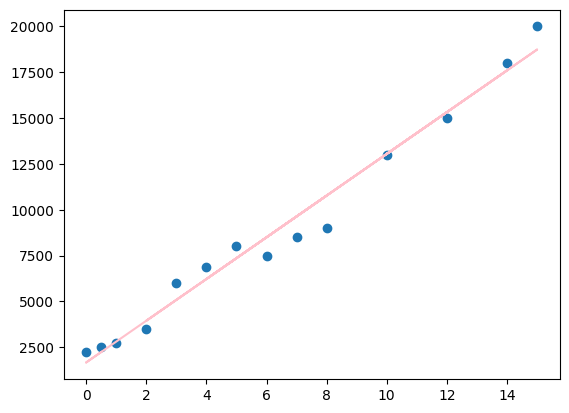

In [19]:
plt.plot(x, y_head, color="pink") # yıl değerlerini oluşturulan modele göre tahmin eder ve çizer
plt.scatter(x,y)
plt.show()

In [20]:
from sklearn.metrics import r2_score
print("R Square Score: ",r2_score(y,y_head)) #R^2 e göre doğruluk oranı hesaplanır model başarılıdır burada parametreler asıl değerler ve tahmşn değerleridir

R Square Score:  0.9775283164949903


In [21]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y,y_head))

Mean Squared Error:  685945.845961494


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("/content/drive/MyDrive/MachineLearning/datasets/Advertising.csv")

In [24]:
data.head(9)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8


In [25]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) # veri setini %30 test olacak şekilde ayırdık

In [27]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [28]:
 print("Intercept: ", mlr.intercept_) # x in 0 olduğu durumda y eksenini hesaplar
print("Coefficients:")
list(zip(X, mlr.coef_))  # diğer bağımsız değişkenlerin katsayılarını hesaplar

Intercept:  2.652789668879498
Coefficients:


[('TV', 0.04542559602399794),
 ('Radio', 0.18975772766893614),
 ('Newspaper', 0.004603078953112072)]

In [29]:
y_pred_mlr= mlr.predict(X_test)
print("Prediction for test set: {}".format(y_pred_mlr)) #burada çoklu lineer regression örneğini uyguluyoruz

Prediction for test set: [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


In [30]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr}) # gerçek değerler ile tahmini değerlere arasındaki farkı içeren tabloyu oluituruyoruz
mlr_diff.head()

,Actual value,Predicted value
126,6.6,10.621601
104,20.7,20.006253
99,17.2,16.918509
92,19.4,19.170407
111,21.8,20.949741


In [34]:
from sklearn.metrics import r2_score
print("R Square Score: ",r2_score(y_test,y_pred_mlr))
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr) # MSE hesaplanır
print('R squared: {:.2f}'.format(mlr.score(X,y))) # r^2 hesaplanır
print('Mean Square Error:', meanSqErr)

R Square Score:  0.9058622107532246
R squared: 0.90
Mean Square Error: 1.8506819941636963


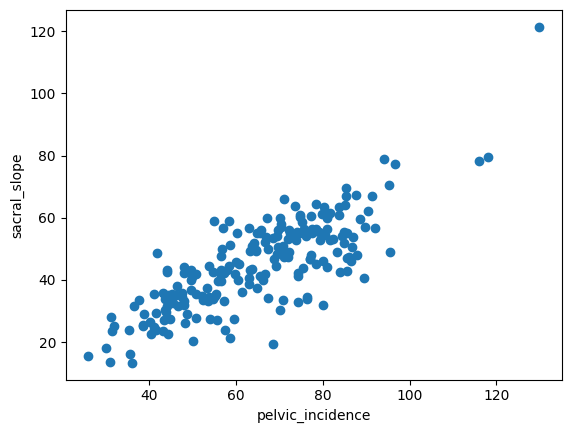

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df = pd.read_csv("/content/drive/MyDrive/MachineLearning/datasets/column_2C_weka.csv")

df.tail()
df.head()

abnormaldata1 = df[df['class'] =='Abnormal']
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.show()

0.427619799498007
0.4607746393295514


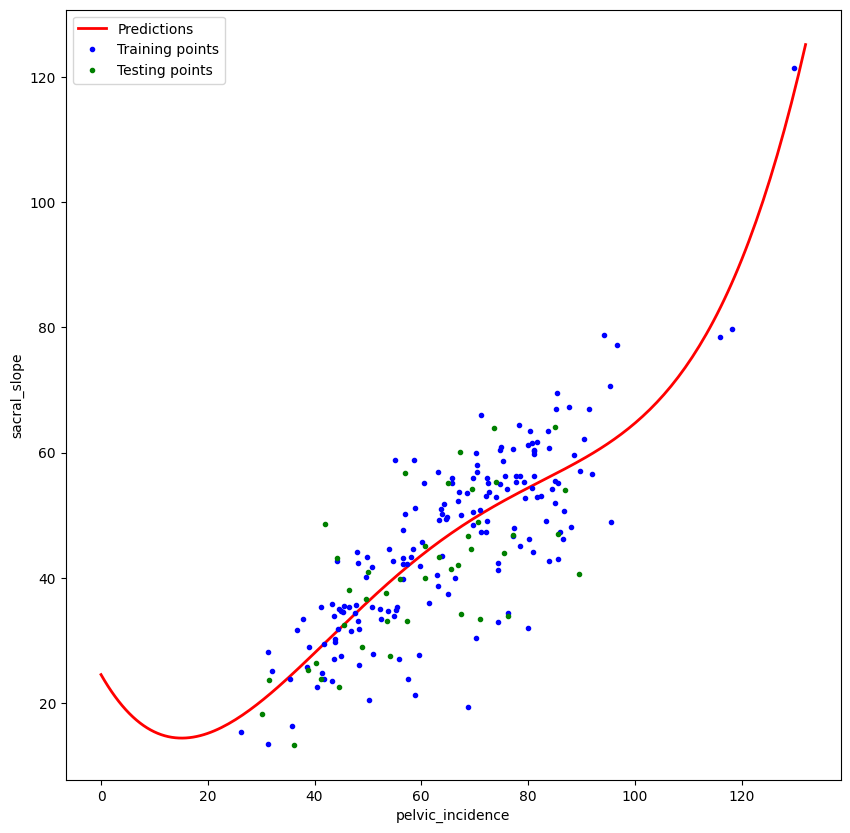

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred)) # dataseti karsşılaştırır ve r'2 hesaplar

poly = PolynomialFeatures(degree=4, include_bias=True) # 4. derece bir polinom oluşturulur ve tekrar test edilir
x_train_trans = poly.fit_transform(x_train)          # 
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred)) #polinom dönüşümü ile oluşturulan model daha verimlidir


X_new = np.linspace(0, 132, 200).reshape(200, 1)

X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.figure(figsize=[10,10])
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.legend()
plt.show()

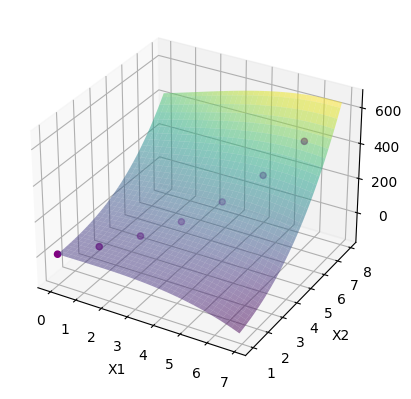

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


x1 = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([2, 12, 40, 90, 172, 292, 454])

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(np.column_stack((x1, x2)))

model = LinearRegression()
model.fit(x_poly, y)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1_pred, x2_pred = np.meshgrid(np.arange(0, 7, 0.1), np.arange(1, 8, 0.1))
y_pred = model.predict(poly.fit_transform(np.column_stack((x1_pred.ravel(), x2_pred.ravel()))))
y_pred = y_pred.reshape(x1_pred.shape)

ax.scatter(x1, x2, y, c='purple')
ax.plot_surface(x1_pred, x2_pred, y_pred, cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

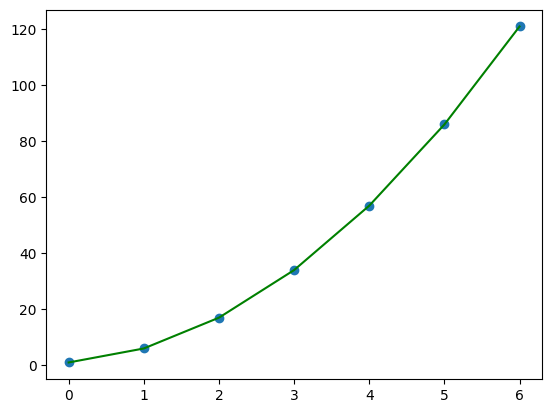

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([1, 6, 17, 34, 57, 86, 121])


poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))

model = LinearRegression()
model.fit(x_poly, y)

plt.scatter(x, y)
plt.plot(x, model.predict(x_poly), color='green')
plt.show()